# Uncertainty Quantification Project

## Codes Part III

### Abhishek Chandra - M2CHPS (University of Lille)

In [1]:
# importing support libraries

import numpy as np                   # for making arrays, martix, calculating mean, variance etc.
import matplotlib.pyplot as plt      # for plottimg histograms etc
from scipy.stats import norm         # To use in gaussian distribution

In [2]:
# Defining constant input parameters of the model

rcul = 8.8e-3          # radius of the iron core
rbob = 17e-3           # external radius of the coil
rclo = 20e-3           # external radius
raim = 9.4e-3          # radius of the magnet

hclo = 6e-3            # height of base of the yoke
hent = 6e-3            # height of the air gap
hbob = 9e-3            # height of the coil
hpm = 5e-3             # height of the mobil plate

mur = 3000             # relative permeability of the yoke
n = 3200               # number of turns

In [3]:
# Defining random input parameters of the model (at the moment feeding deterministic values)

br = 1.2               # remanent magnetic flux density of the magnet     uncertainty - 5%
haim = 10e-3           # height of the magnet                             uncertainty - 5%
e = 0.5e-3             # air gap between the core and the yoke            uncertainty - 15%
ep = 5e-5              # parasitic air gap                                uncertainty - 40%
current = 0.0652       # current in the coil                              uncertainty - 10%

In [4]:
# Defining Constant
mu0=4*np.pi*1e-7                                                 # permeability of the air

#Calculation of the reluctances
Re=e/(mu0*2*np.pi*(rbob-e)*hent)                                  # reluctance of the airgap
Rp=ep/(mu0*np.pi*rcul*rcul)+ep/(mu0*np.pi*(rclo*rclo-rbob*rbob))  # reluctance of the paraistic airgap
Ra=haim/(mu0*np.pi*raim*raim)                                     # reluctance of the magnet
ksia=br*haim/mu0                                                  # magnetomotive force of the magnet

# Calculation of the flux
# When no currrent is supplied

phia1=((Rp+Re)*ksia)/(Ra*Rp+Ra*Re+Re*Rp)                          # flux flowing through the permanent magnet
phib1=-(Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)                              # magnetic flux in the mobil plate

#calculation of force 1
force1=np.abs((phib1*phib1)/(2*mu0*np.pi*rcul*rcul)+phib1*phib1/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))

# When currrent is supplied

phia2=((Rp+Re)*(ksia)-(Re*n*current))/((Ra*Rp)+(Ra*Re)+(Re*Rp))   # flux flowing through the permanent magnet
phib2=((Ra+Re)*n*current-Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)             # magnetic flux in the mobil plate

#calculation of force 2
force2=np.abs((phib2*phib2)/(2*mu0*np.pi*rcul*rcul)+phib2*phib2/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
print("Determinitic mean of force 1: ",np.mean(force1))
print("Determinitic mean of force 2: ",np.mean(force2))
print("Determinitic std of force 1: ",np.std(force1))
print("Determinitic std of force 2: ",np.std(force2))

Determinitic mean of force 1:  147.80442684301696
Determinitic mean of force 2:  0.00015857704866025844
Determinitic std of force 1:  0.0
Determinitic std of force 2:  0.0


#  Part III - Stratified

In [5]:
R = 100
k = 4
Rj = R//k

br = 1.2               #Remanent magnetic flux density of the magnet (T)
br_min = br - 0.05*br
br_max = br + 0.05*br
alpha_br = np.linspace(br_min, br_max, k+1)

br = np.zeros((k,Rj))
for i in range(k):
    for j in range(Rj):
        br[i,j] = np.random.uniform(alpha_br[i],alpha_br[i+1])

#br=np.random.uniform(br_min, br_max, R)    
#br=np.random.normal((br_min+br_max)/2, (br_max-br_min)**2/12, R)    

e=0.5e-3             #air gap between the core and the yoke (m)
e_min = e - 0.15*e
e_max = e + 0.15*e
alpha_e = np.linspace(e_min, e_max, k+1)

e = np.zeros((k,Rj))
for i in range(k):
    for j in range(Rj):
        e[i,j] = np.random.uniform(alpha_e[i],alpha_e[i+1])

#e = np.random.uniform(e_min,e_max,R)
#e = np.random.normal((e_min+e_max)/2, (e_max-e_min)**2/12, R)


ep=5e-5  #Parasitic air gap (m)
ep_min = ep - 0.4*ep
ep_max = ep + 0.4*ep
alpha_ep = np.linspace(ep_min, ep_max, k+1)

ep = np.zeros((k,Rj))
for i in range(k):
    for j in range(Rj):
        ep[i,j] = np.random.uniform(alpha_ep[i],alpha_ep[i+1])

#ep = np.random.uniform(ep_min,ep_max,R)
#ep = np.random.normal((ep_min+ep_max)/2, (ep_max-ep_min)**2/12, R)


haim=10e-3    #height of the magnet (m)
haim_min = haim - 0.05*haim
haim_max = haim + 0.05*haim
alpha_haim = np.linspace(haim_min, haim_max, k+1)

haim = np.zeros((k,Rj))
for i in range(k):
    for j in range(Rj):
        haim[i,j] = np.random.uniform(alpha_haim[i],alpha_haim[i+1])

#haim = np.random.uniform(haim_min,haim_max,R)
#haim = np.random.normal((haim_min+haim_max)/2, (haim_max-haim_min)**2/12, R)


current=0.0652                                  #current in the coil
current_min = current - 0.1*current
current_max = current + 0.1*current
alpha_current = np.linspace(current_min, current_max, k+1)

current = np.zeros((k,Rj))
for i in range(k):
    for j in range(Rj):
        current[i,j] = np.random.uniform(alpha_current[i],alpha_current[i+1])

#current = np.random.uniform(current_min,current_max,R)                              
#current = np.random.normal((current_min+current_max)/2, (haim_max-haim_min)**2/12, R)



In [6]:
rcul=8.8e-3                                        #radius of the iron core (m)
rbob=17e-3                                        #external radius of the coil (m)
rclo=20e-3                                        #external radius (m)
raim=9.4e-3                                      #Radius of the magnet (m)
hclo=6e-3                                       #height of base of the yoke (m)
hent=6e-3                                      #height of the air gap e (m)
hbob=9e-3                                       #height of the coil (m)
hpm=5e-3                                        #height of the mobil plate (m)
mur=3000                                        #relative permeability of the yoke
n=3200                                        #number of turns
#CONSTANTS
#permeability of the air
mu0=4*np.pi*1e-7
Re=e/(mu0*2*np.pi*(rbob-e)*hent)                                  #reluctance of the airgap
Rp=ep/(mu0*np.pi*rcul*rcul)+ep/(mu0*np.pi*(rclo*rclo-rbob*rbob))  #reluctance of the paraistic airgap
Ra=haim/(mu0*np.pi*raim*raim)                                     #reluctance of the magnet
ksia=br*haim/mu0                                                #magnetomotive force of the magnet
#Not supplied
#Calculation of the flux
#flux flowing through the permanent magnet
phia1=((Rp+Re)*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
#magnetic flux in the mobil plate
phib1=-(Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
force1=np.abs((phib1*phib1)/(2*mu0*np.pi*rcul*rcul)+phib1*phib1/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
#Supplied by a current
#Calculation of the flux
#flux flowing through the permanent magnet
phia2=((Rp+Re)*(ksia)-(Re*n*current))/((Ra*Rp)+(Ra*Re)+(Re*Rp))
#magnetic flux in the mobil plate
phib2=((Ra+Re)*n*current-Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
#calculation of the force
force2=np.abs((phib2*phib2)/(2*mu0*np.pi*rcul*rcul)+phib2*phib2/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
m1 = np.mean(force1)
m2 = np.mean(force2)
s1 = np.std(force1)/np.sqrt(R)
s2 = np.std(force2)/np.sqrt(R)
convf1 = s1/R
convf2 = s2/R

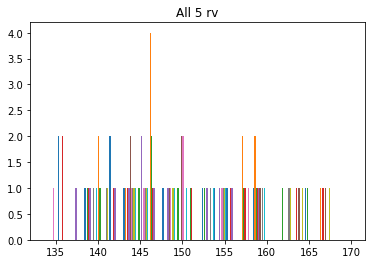

In [8]:
plt.hist(force1,bins = 'auto')
#plt.hist(force2, bins = 'auto')
#plt.show()
#print("mean for force1",m1)
#print("mean for force2",m2)
#print("standard deviation for force1 by sqrt R",s1)
#print("standard deviation for force2 by sqrt R",s2)
plt.title("All 5 rv")
plt.savefig("str_all_force1.jpg")